In [1]:
!python --version

import re
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt


Python 3.7.7


In [2]:
year = '2017'
xlsfile = f"input_data/{year}_poor_per_province.xlsx"
poor = pd.read_excel(xlsfile, dtype=str, index_col=None)

In [3]:
#poor.info()
#print( len( poor["provEN"].values ) )
poor.columns

Index(['provTH', 'provEN', 'all', 'poor', 'very poor'], dtype='object')

In [4]:
file1 = "input_data/tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm1_rtsd_20190221.shp"
#file2 = "input_data/tha_adm_rtsd_itos_20190221_SHP_PART_1/tha_admbnda_adm2_rtsd_20190221.shp"

thgeo1 = gpd.read_file(file1)
#thgeo2 = gpd.read_file(file2)


In [5]:
#thgeo1.info()
#print( len( thgeo1["ADM1_EN"].values ) )
thgeo1.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_TH', 'ADM1_PCODE',
       'ADM1_REF', 'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM1ALT1TH', 'ADM1ALT2TH',
       'ADM0_EN', 'ADM0_TH', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'geometry'],
      dtype='object')

In [6]:
df = thgeo1[['ADM1_EN', 'ADM1_TH', 'geometry']].copy()
poor.rename(columns = {'provEN': 'ADM1_EN', 'provTH': 'ADM1_TH'}, inplace=True)

# strip leading/trailing whitespaces #
columns = ['ADM1_EN', 'ADM1_TH']

for column in columns:
    df[column] = df[column].str.strip()
    poor[column] = df[column].str.strip()

result = pd.merge(df, poor, on=columns)
result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ADM1_EN    77 non-null     object  
 1   ADM1_TH    77 non-null     object  
 2   geometry   77 non-null     geometry
 3   all        77 non-null     object  
 4   poor       77 non-null     object  
 5   very poor  77 non-null     object  
dtypes: geometry(1), object(5)
memory usage: 4.2+ KB


In [7]:
result['centroid'] = result.centroid

/Users/zastrow/anaconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [8]:
result['all'] = result['all'].astype(np.float)
result['poor'] = result['poor'].astype(np.float)
result['very poor'] = result['very poor'].astype(np.float)


/Users/zastrow/anaconda3/envs/pygeo/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


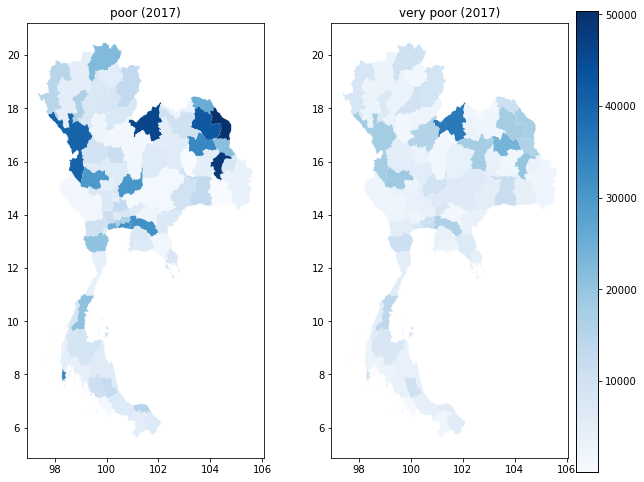

In [9]:
selections = ['poor', 'very poor']

fig, axs = plt.subplots(1,2,figsize=(10,8))
cmap = 'Blues'

vmin, vmax = result[selections].min().min(), result[selections].max().max()

result = result.set_geometry("geometry")

for ax,selection in zip(axs, selections):
    #vmin, vmax = result[selection].min(), result[selection].max()
    result.plot(column=selection, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax)
    ax.set_title(f"{selection} ({year})")
    # add colorbar
    fig = ax.get_figure()
    cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # fake up the array of the scalar mappable. Urgh...
    sm._A = []
    fig.colorbar(sm, cax=cax)


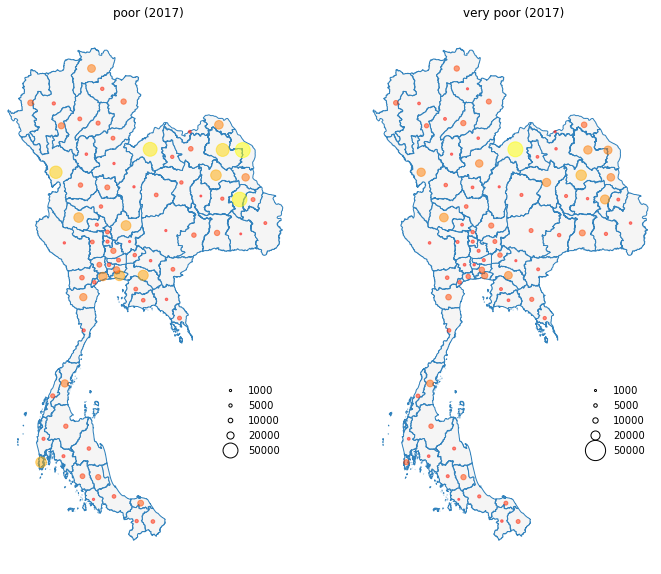

In [12]:
import geoplot as gplt

selections = ['poor', 'very poor']

fig, axs = plt.subplots(1,2,figsize=(12,10))
cmap = 'autumn'

for ax,selection in zip(axs, selections):
    vmin, vmax = result[selection].min(), result[selection].max()
    
    result = result.set_geometry("geometry")
    result.plot(figsize=(16,12), color="whitesmoke", edgecolor='#3182bd', ax=ax)
    
    result = result.set_geometry("centroid")
    gplt.pointplot(result, scale=selection, \
               limits=(2,15), hue=selection, cmap=cmap, alpha=0.5, \
               legend=True, legend_var='scale', \
               legend_kwargs={'bbox_to_anchor': (1, 0.35), 'frameon': False}, \
               legend_values=[1000, 5000, 10000, 20000, 50000], \
               ax=ax)
    ax.set_title(f"{selection} ({year})")

<AxesSubplot:>

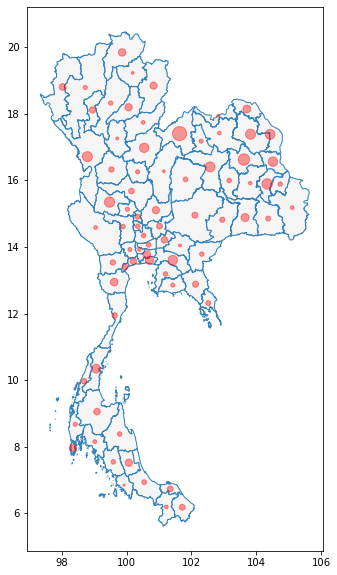

In [11]:
selection = 'very poor'
vmin, vmax = result[selection].min(), result[selection].max()
cmap = 'Hot'

result = result.set_geometry("geometry")
ax=result.plot(figsize=(12,10), color="whitesmoke", edgecolor='#3182bd')

result = result.set_geometry("centroid")
result.plot(ax=ax, markersize=200*result[selection]/vmax, vmin=vmin, vmax=vmax, alpha = 0.4, color='red')
